# Assignment
The basic problem is the emergence of an unknown infectious disease. There is 1 person infectious and a population of 100000 is susceptible. The character of the disease is unknown up front. The challenge is to design a strategy to prevent a disruptive outbreak, while the invasiveness of the strategy should be kept proportional to the severity of the disease. That is, there is no reason to quarantine everyone and close schools etc. if there is no evidence that the disease is really serious. 

The following table specifies the uncertainties surrounding the outbreak. They have been informed by experience with previous outbreaks of a wide range of diseases. 

|Uncertainties              |Range	        |Default value|
|--------------------------:|--------------:|------------:|
|Average incubation time   	|0.5 – 14	    |2            |
|Average infectious period	|7 – 21      	|14           |
|Basic reproduction number 	|0.5 – 5	    |2            |
|Case fatality rate	        |0.01 – 0.5	    |0.01         |
|Switch SEIR or SIR     	|{1, 0}	        |0            |

The following initial values should be used

|Constants                       | Value |
|-------------------------------:|------:|
|Initial deceased population     |0      |
|Initial exposed population      |0      |
|Initial infectious population   |1      |
|Initial recovered population    |0      |
|Initial susceptible population  |100000 |

The model is provided as a vensim mdl file (EIR or SIR 20170501.mdl), but is importable using pysd. That is, you should be able to work with the model also on a mac and with Python 64 bit. Any interventions can be added to the model through vensim before importing the modified model into pysd. For those of you who don't have pysd installed, it is available through pip. 

A starting point for inspiration for the assignment is the work of Willem Auping, Erik Pruyt and me on the Mexican Flu and Ebola. A quick search in Scopus should point you to the relevant papers. To get a sense for how decision making takes place during massive pandemics, a further literature search on either the most recent ebola outbreak or the Mexican flu should turn up relevant papers. 


## Key requirements of the assignment
* Any modeled interventions should have a clear real world meaning, and the link between the model and the real world interpretation should be given.
* The design of any candidate intervention should be clearly motivated
* Not all relevant decision considerations can be covered by the model, a proper balance between modeling and qualitative reasoning is thus required. For example, the default model only covers the dynamics of a disease, and not the disruptive impact of quarantines and social distancing polices (e.g. closing schools).

## Key Deliverables
* a final report with a motivated strategy for counteracting the disease
* a reflection on the advice given the political context of time urgent high risk decision making as typically encountered during pandemic outbreaks
* a collection of reproducible model based analyses that were conducted while crafting the strategy. Here reproducible means that anyone of your fellow students should be able to rerun your analyses. This entails clear explicit documentation of your code, clearly state any non-standard dependencies, and ensure that all the relevant files etc. are submitted in a clear directory structure. In addition, there should be an explicit motivation for each analysis step. This motivation should involve references to relevant literature where appropriate (see also http://nbviewer.jupyter.org/github/ipython/nbconvert-examples/blob/master/citations/Tutorial.ipynb for one way of doing this in notebooks). 

Time permitting, I plan to do a friendly bake-off where I will compare the performance of all strategies from all groups over a set of scenarios. There might be some black swans amongst the scenarios.... . This bake-off will result in a many-objective robustness ranking of all strategies. To make this work, it is paramount that I receive from each group a vensim / pysd model with the final advised strategy, and the associated python code for running the model. 

## Grading considerations
* appropriate and correct use of various exploratory modeling techniques
* quality of interpretation of exploratory modeling results
* clarity of reasoning in translating interpretation of exploratory modeling results into candidate interventions
* use of additional literature beyond course readings
* the correctness of translating a strategy into the System Dynamics model. Given that System Dynamics is not the focus of this core, this criterion will not be weighted to heavily. 




In [11]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:

import ema_workbench as ema
from ema_workbench.connectors.vensim import VensimModel

In [5]:
from ema_workbench import (RealParameter, TimeSeriesOutcome,ema_logging,
                           perform_experiments,IntegerParameter, Constant,
                          ScalarOutcome)
# from ema_workbench import 

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO);

In [4]:
mdl_file = 'model/SEIR or SIR 20170501.vpm'


In [27]:
model = VensimModel("defaultModel",model_file=mdl_file)

model.uncertainties = [
    RealParameter("Average incubation time",0.5,14),
    RealParameter("Average infectious period", 7,21),
    RealParameter("Basic reproduction number",0.5,5),
    RealParameter("Case fatality rate",0.01,0.5),
    IntegerParameter("Switch SEIR or SIR",0,1)
]

model.constants = [
    Constant("Initial deceased population",0),
    Constant("Initial exposed population",0),
    Constant("Initial infectious population",1),
    Constant("Initial recovered population", 0),
    Constant("Initial susceptible population", 100000),
]

def time_of_max(infectious_population, time):
    index = np.where(infectious_population==np.max(infectious_population))
    timing = time[index][0]
    return timing

model.outcomes = [
    TimeSeriesOutcome("Deceased population"),
    TimeSeriesOutcome("Infectious population"),
    ScalarOutcome('max infectious population',
                 variable_name='Infectious population',
                 function=np.max),
    ScalarOutcome('time of max infectious population',
                 variable_name=['Infectious population','TIME'],
                 function=time_of_max)
    
]

In [28]:

results = perform_experiments(model,1000)

[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished


In [29]:
ema.save_results(results,"results/1000runs_2outcomes")

[MainProcess/INFO] results saved successfully to C:\Users\Gebruiker\Documents\GitHub\MBDM-project\final assignment\results\1000runs_2outcomes


In [50]:
results2 = ema.load_results("results/1000runs_2outcomes")

[MainProcess/INFO] results loaded succesfully from C:\Users\Gebruiker\Documents\GitHub\MBDM-project\final assignment\results\1000runs_2outcomes


In [34]:
from ema_workbench.analysis import pairs_plotting

In [35]:
import matplotlib.pyplot as plt

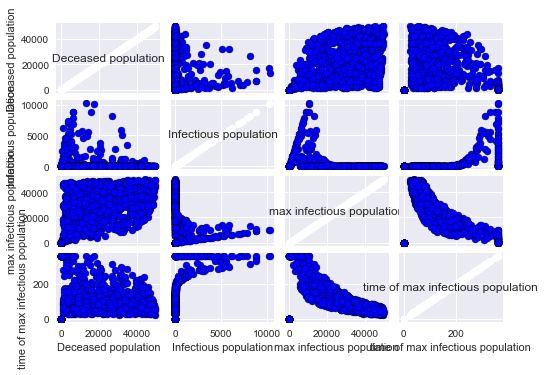

In [36]:
pairs_plotting.pairs_scatter(results)
plt.show()

In [25]:

from ema_workbench.analysis.plotting import envelopes 
from ema_workbench.analysis.plotting_util import KDE

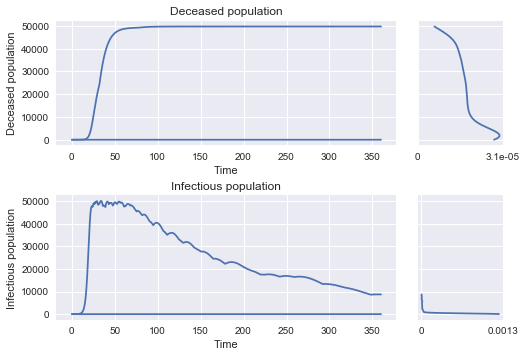

In [31]:
fig, axes = envelopes(results, density=KDE, fill=False)

# # we can access each of the axes and make changes
# for key, value in axes.iteritems():
#     # the key is the name of the outcome for the normal plot
#     # and the name plus '_density' for the endstate distribution
#     if key.endswith('_density'):
#         value.set_xscale('log')

plt.show()

# putting results together in DF

For the original model, 2 objectives:

In [51]:
experiments, outcomes = results2

In [52]:
df_experiments = pd.DataFrame.from_records(experiments)

In [62]:
temp = []
columnnames = []#[x for x in outcomes.keys()]
print(outcomes.keys())
for key in outcomes.keys():
    temp.append(outcomes[key].max(axis=1))
    temp.append(outcomes[key][:,-1])
    columnnames.append(key+"_Max")
    columnnames.append(key+"_Last")

df_outcomes = pd.DataFrame(np.array(temp).T, columns=columnnames)

dict_keys(['TIME', 'Deceased population', 'Infectious population', 'max infectious population', 'time of max infectious population'])


ValueError: 'axis' entry is out of bounds

To reduce the dimensions in the outcomespace, we choose two objectives: The deceased population at the last timestep of the model run and the Maximum infectious population over time for each model run.

In [57]:
df_outcomes = df_outcomes[["Deceased population_Last","Infectious population_Max"]]

In [58]:
df_results = pd.merge(df_experiments,df_outcomes, left_index=True, right_index=True)

In [70]:
df_results.head(1)

,Average incubation time,Average infectious period,Basic reproduction number,Case fatality rate,Switch SEIR or SIR,scenario_id,policy,model,Deceased population_Last,Infectious population_Max
0,4.912158,12.626156,3.860507,0.269812,0,1000,None,defaultModel,26662.078125,40823.738281


For the original model with 4 objectives

In [60]:
experiments, outcomes = results

In [61]:
df_experiments = pd.DataFrame.from_records(experiments)

In [93]:
temp = []
labels = []
temp.append(outcomes['Deceased population'][:,-1])
labels.append('Deceased population_Last')
temp.append(outcomes['max infectious population'])
labels.append("max infectious population")
temp.append(outcomes['time of max infectious population'])
labels.append("time of max infectious population")

In [94]:
df_outcomes = pd.DataFrame(np.array(temp).T,columns=labels)

In [95]:
df_results = pd.merge(df_experiments,df_outcomes,left_index=True, right_index=True)

In [96]:
df_results

,Average incubation time,Average infectious period,Basic reproduction number,Case fatality rate,Switch SEIR or SIR,scenario_id,policy,model,Deceased population_Last,max infectious population,time of max infectious population
0,9.776815,20.757304,1.990908,0.387182,0,0,None,defaultModel,33524.171875,17907.505859,239.500
1,13.167958,14.199863,3.548976,0.463488,0,1,None,defaultModel,45930.953125,39322.367188,69.750
2,7.293497,14.173562,0.815706,0.066712,0,2,None,defaultModel,0.358586,1.000000,0.000
3,5.650500,18.447281,4.604470,0.311566,0,3,None,defaultModel,31028.093750,46890.273438,66.125
4,5.264836,14.234922,0.602413,0.423386,0,4,None,defaultModel,1.064828,1.000000,0.000
5,12.417600,19.658617,4.639497,0.464795,0,5,None,defaultModel,46387.320312,48040.640625,69.750
6,3.990921,18.739911,3.810963,0.344093,0,6,None,defaultModel,34067.960938,40885.085938,84.375
7,4.939344,18.611394,2.782464,0.448036,0,7,None,defaultModel,43512.687500,30669.554688,126.750
8,3.517553,7.017586,3.834929,0.054835,0,8,None,defaultModel,5367.817383,39213.214844,31.375
9,5.687393,7.820752,3.476013,0.408159,0,9,None,defaultModel,40312.390625,38202.679688,39.500


## find correlation and regression between x and y

In [97]:
df_results.corr(method="spearman").ix[:5,5:]

,Deceased population_Last,max infectious population,time of max infectious population
Average incubation time,-0.004834,0.028046,-0.021708
Average infectious period,0.000605,-0.002366,0.330293
Basic reproduction number,0.562824,0.997300,-0.322961
Case fatality rate,0.643569,0.053476,0.014561
Switch SEIR or SIR,NaN,NaN,NaN


In [182]:
df_results.corr(method="spearman").ix[0:5,-2:]

,Deceased population_Last,Infectious population_Max
Average incubation time,-0.015712,-0.023795
Average infectious period,-0.041545,-0.018972
Basic reproduction number,0.545502,0.997313
Case fatality rate,0.614511,0.013747
Switch SEIR or SIR,NaN,NaN


In [183]:
from pandas.stats.api import ols

In [207]:
import statsmodels.api as sm

mod = sm.OLS(df_outcomes['Deceased population_Last'],df_experiments[[0,1,2,3]])
res = mod.fit()

In [208]:
print(res.summary())

                               OLS Regression Results                               
Dep. Variable:     Deceased population_Last   R-squared:                       0.874
Model:                                  OLS   Adj. R-squared:                  0.874
Method:                       Least Squares   F-statistic:                     1733.
Date:                      Wed, 14 Jun 2017   Prob (F-statistic):               0.00
Time:                              11:50:35   Log-Likelihood:                -10478.
No. Observations:                      1000   AIC:                         2.096e+04
Df Residuals:                           996   BIC:                         2.098e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------

## Kwakkels code, not sure what to do with it, look later

In [25]:
plt.show()

In [7]:
from ema_workbench import Scenario, Policy

model.run_model(Scenario(1, **{}), Policy(2, **{}))

ParseError: Rule 'subscript' didn't match at '(A1-A100)' (line 1, column 10).

In [37]:
ema.analysis.

AttributeError: module 'ema_workbench.analysis' has no attribute 'scenario_discorvery_util'

# If at some point we are doing PRIM:

choose an objective column
<br>And for the Y used in PRIM:
<br>use a binary scale, good or bad points, 0 or 1.
<br>to choose whether 0 or 1, choose an arbitrary interval: 
<br>E.g. 90%

In [17]:
a = range(1,101)

In [18]:
a = list(a)

In [10]:
import pandas as pd

In [20]:
a = pd.DataFrame(a)

In [46]:
a.quantile(0.9)[0]

90.100000000000009

In [51]:
a[0] > a.quantile(0.9)[0]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90     True
91     True
92     True
93     True
94     True
95     True
96     True
97     True
98     True
99     True
Name: 0, dtype: bool

In [16]:
# for example: 90%
# source: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data/34474255#34474255

import numpy as np, scipy.stats as st

st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(44.743490583289677, 56.256509416710323)